In [1]:
import pandas as pd

# Replace 'your_file_path' with the path to your CSV file
df = pd.read_csv("Downloads/supermarket_sales - Sheet1.csv")
print(df.head())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [18]:
print(df)



      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

In [5]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [20]:
import pandas as pd

# Load your data
df = pd.read_csv("Downloads/supermarket_sales - Sheet1.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])





In [14]:
# Group by Date to get daily sales
daily_sales = df.groupby('Date')['Total'].sum().reset_index()


In [15]:
# Extract year and month from Date
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group by YearMonth to get monthly sales
monthly_sales = df.groupby('YearMonth')['Total'].sum().reset_index()


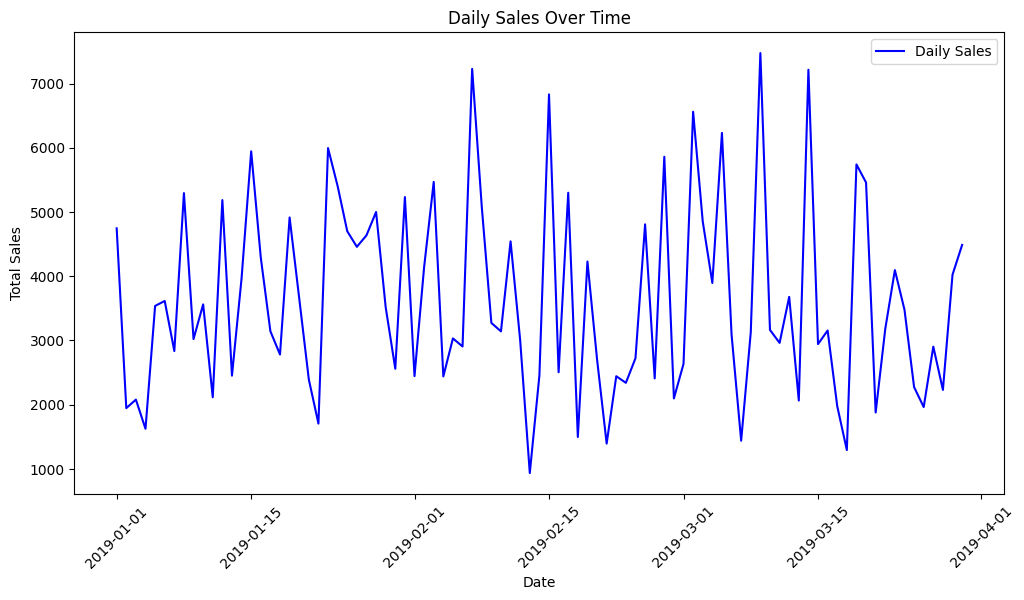

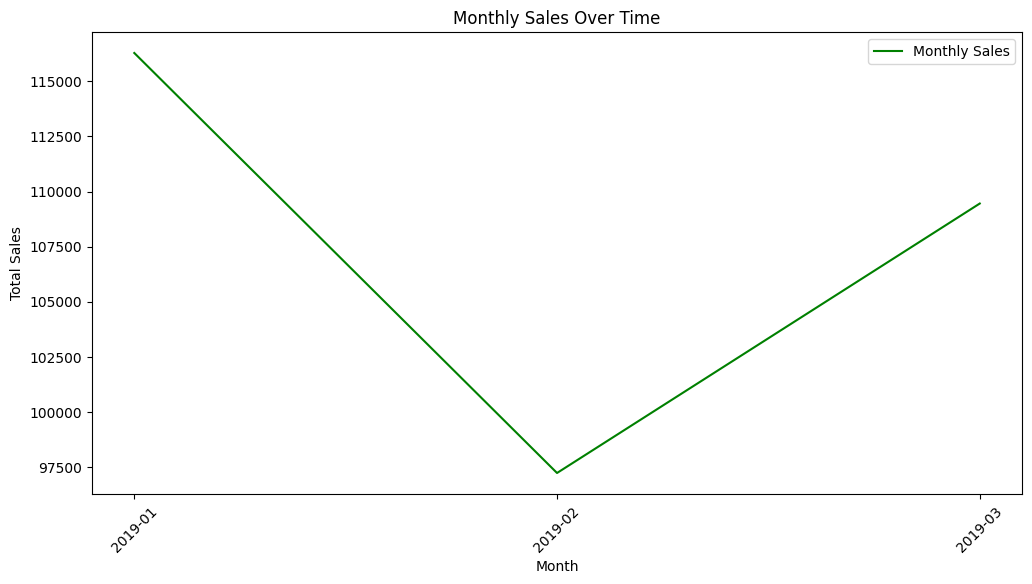

In [16]:
import matplotlib.pyplot as plt

# Daily Sales Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Total'], color='blue', label="Daily Sales")
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Monthly Sales Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['Total'], color='green', label="Monthly Sales")
plt.title("Monthly Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend()
plt.show()


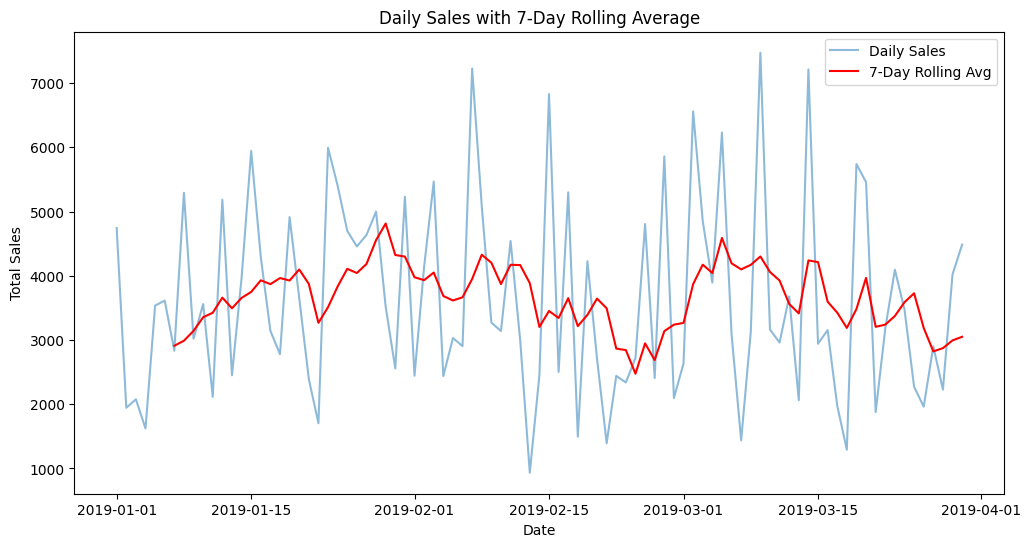

In [17]:
daily_sales['7-day Avg'] = daily_sales['Total'].rolling(window=7).mean()

# Plot with rolling average
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Total'], label="Daily Sales", alpha=0.5)
plt.plot(daily_sales['Date'], daily_sales['7-day Avg'], label="7-Day Rolling Avg", color='red')
plt.title("Daily Sales with 7-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()


In [28]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Downloads/supermarket_sales - Sheet1.csv")

# Group by Product line and sum the Total sales
top_categories = df.groupby('Product line')['Total'].sum().reset_index()

# Sort by total sales in descending order
top_categories_sorted = top_categories.sort_values(by='Total', ascending=False)

# Show the top 10 categories
print(top_categories_sorted.head(10))


             Product line       Total
2      Food and beverages  56144.8440
5       Sports and travel  55122.8265
0  Electronic accessories  54337.5315
1     Fashion accessories  54305.8950
4      Home and lifestyle  53861.9130
3       Health and beauty  49193.7390


In [2]:
# Group by Product line and sum the Quantity sold
top_categories_by_quantity = df.groupby('Product line')['Quantity'].sum().reset_index()

# Sort by quantity sold in descending order
top_categories_by_quantity_sorted = top_categories_by_quantity.sort_values(by='Quantity', ascending=False)

# Show the top 10 categories by quantity sold
print(top_categories_by_quantity_sorted.head(10))



             Product line  Quantity
0  Electronic accessories       971
2      Food and beverages       952
5       Sports and travel       920
4      Home and lifestyle       911
1     Fashion accessories       902
3       Health and beauty       854


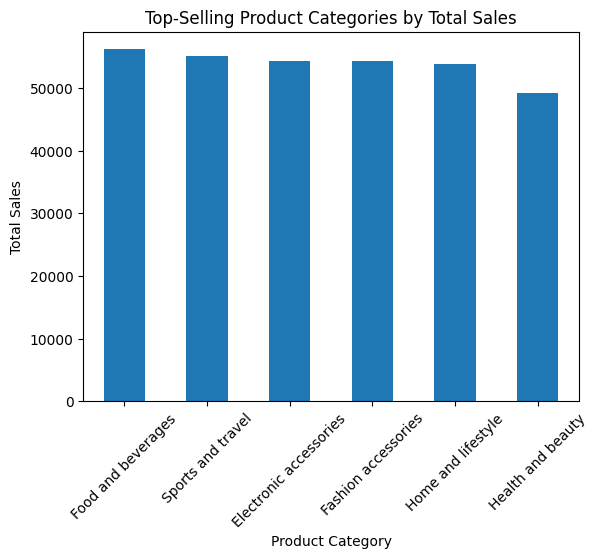

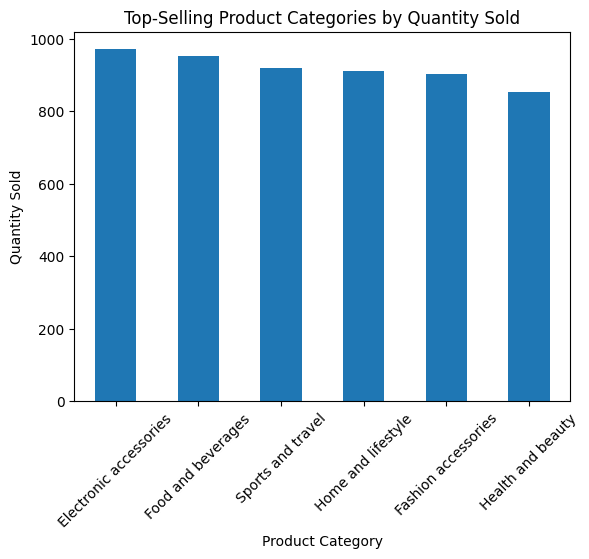

In [32]:
import matplotlib.pyplot as plt

# Plot the top-selling categories by total sales
top_categories_sorted.head(10).plot(kind='bar', x='Product line', y='Total', legend=False)
plt.title("Top-Selling Product Categories by Total Sales")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Plot the top-selling categories by quantity sold
top_categories_by_quantity_sorted.head(10).plot(kind='bar', x='Product line', y='Quantity', legend=False)
plt.title("Top-Selling Product Categories by Quantity Sold")
plt.xlabel("Product Category")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()


In [33]:
# View the columns in the dataset
print(df.columns)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month'],
      dtype='object')


In [34]:
# Summary of customer demographics
print(df['Gender'].value_counts())  # Count of male/female customers
print(df['Customer type'].value_counts())  # Count of regular/guest customers


Gender
Female    501
Male      499
Name: count, dtype: int64
Customer type
Member    501
Normal    499
Name: count, dtype: int64


In [36]:
# Check the unique values in the Customer type column
print(df['Customer type'].unique())


['Member' 'Normal']


In [37]:
# Group by Customer type and sum the Total sales
sales_by_customer_type = df.groupby('Customer type')['Total'].sum().reset_index()

# Sort by total sales in descending order
sales_by_customer_type_sorted = sales_by_customer_type.sort_values(by='Total', ascending=False)

# Show the spending by customer type
print(sales_by_customer_type_sorted)


  Customer type       Total
0        Member  164223.444
1        Normal  158743.305


In [38]:
# Calculate the average Total sales per transaction by Customer type
average_spending_by_customer_type = df.groupby('Customer type')['Total'].mean().reset_index()

# Sort by average spending in descending order
average_spending_by_customer_type_sorted = average_spending_by_customer_type.sort_values(by='Total', ascending=False)

# Show the average spending per transaction by customer type
print(average_spending_by_customer_type_sorted)


  Customer type       Total
0        Member  327.791305
1        Normal  318.122856


In [39]:
# Group by Customer type and sum the Quantity purchased
quantity_by_customer_type = df.groupby('Customer type')['Quantity'].sum().reset_index()

# Sort by quantity in descending order
quantity_by_customer_type_sorted = quantity_by_customer_type.sort_values(by='Quantity', ascending=False)

# Show the quantity purchased by customer type
print(quantity_by_customer_type_sorted)


  Customer type  Quantity
0        Member      2785
1        Normal      2725


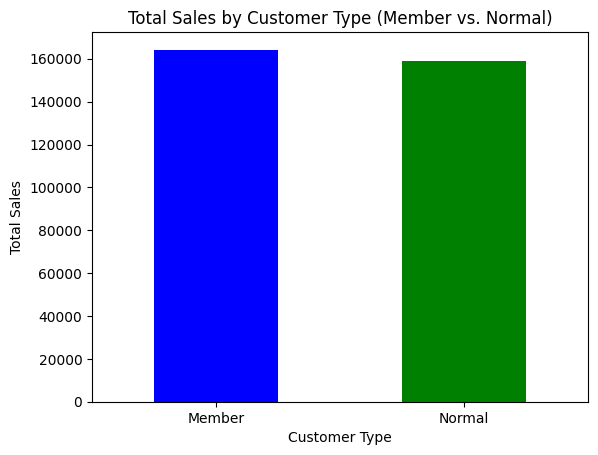

In [40]:
import matplotlib.pyplot as plt

# Plot total sales by Customer type
sales_by_customer_type_sorted.plot(kind='bar', x='Customer type', y='Total', legend=False, color=['blue', 'green'])
plt.title("Total Sales by Customer Type (Member vs. Normal)")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.show()


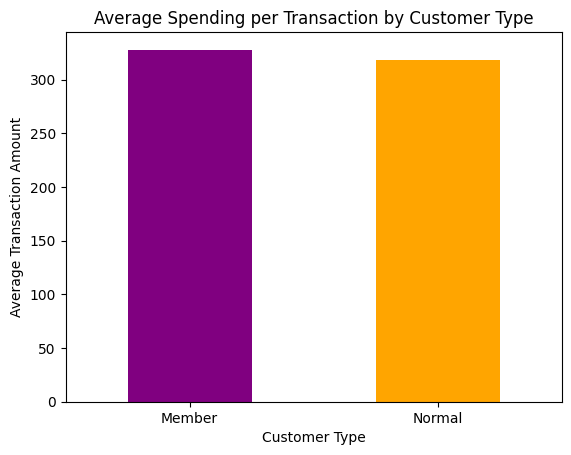

In [41]:
# Plot average spending per transaction by Customer type
average_spending_by_customer_type_sorted.plot(kind='bar', x='Customer type', y='Total', legend=False, color=['purple', 'orange'])
plt.title("Average Spending per Transaction by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Average Transaction Amount")
plt.xticks(rotation=0)
plt.show()


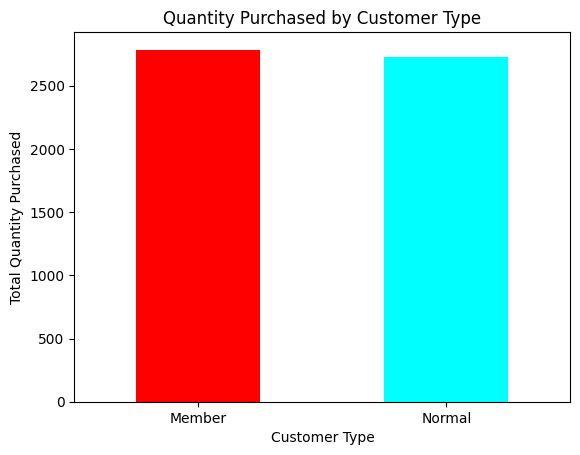

In [42]:
# Plot quantity purchased by Customer type
quantity_by_customer_type_sorted.plot(kind='bar', x='Customer type', y='Quantity', legend=False, color=['red', 'cyan'])
plt.title("Quantity Purchased by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Quantity Purchased")
plt.xticks(rotation=0)
plt.show()


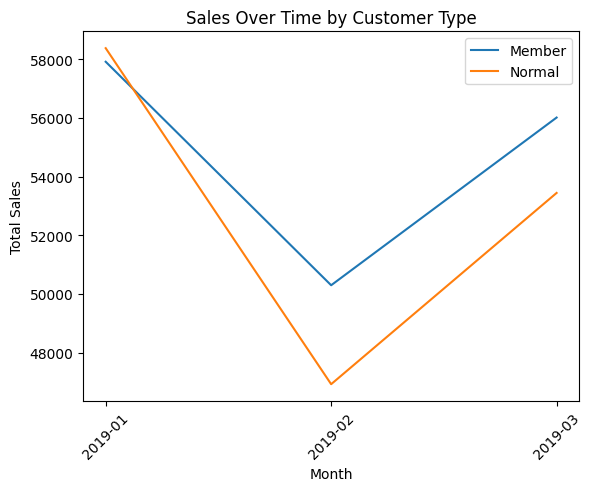

In [43]:
# Convert 'Date' to datetime format if necessary
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')  # Extract month

# Group by Month and Customer type, then sum the Total sales
monthly_sales_by_customer_type = df.groupby(['Month', 'Customer type'])['Total'].sum().reset_index()

# Plot sales over time for each customer type
for customer_type in df['Customer type'].unique():
    monthly_data = monthly_sales_by_customer_type[monthly_sales_by_customer_type['Customer type'] == customer_type]
    plt.plot(monthly_data['Month'].astype(str), monthly_data['Total'], label=customer_type)

plt.title("Sales Over Time by Customer Type")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [9]:
# Convert 'Time' to datetime format, assuming it's in 24-hour format (e.g., "13:08")
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')


In [10]:
# Extract the hour from the Time column
df['Hour'] = df['Time'].dt.hour


In [11]:
# Count the number of purchases per hour
purchases_per_hour = df.groupby('Hour').size().reset_index(name='Number of Purchases')

# Sort by the number of purchases in descending order
purchases_per_hour_sorted = purchases_per_hour.sort_values(by='Number of Purchases', ascending=False)

# Show the peak hours
print(purchases_per_hour_sorted)


    Hour  Number of Purchases
9     19                  113
3     13                  103
5     15                  102
0     10                  101
8     18                   93
1     11                   90
2     12                   89
4     14                   83
6     16                   77
10    20                   75
7     17                   74


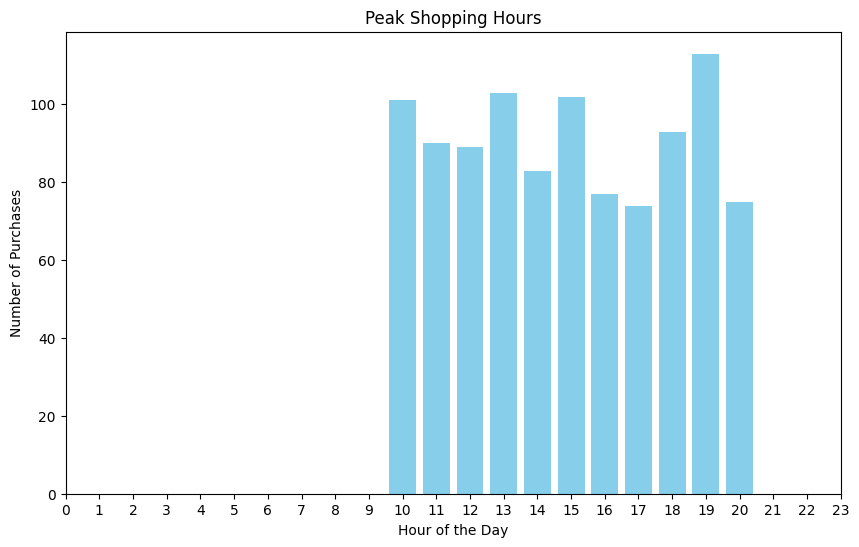

In [12]:
import matplotlib.pyplot as plt

# Plot the number of purchases per hour
plt.figure(figsize=(10, 6))
plt.bar(purchases_per_hour['Hour'], purchases_per_hour['Number of Purchases'], color='skyblue')
plt.title("Peak Shopping Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Purchases")
plt.xticks(range(0, 24))  # Show all hours from 0 to 23
plt.show()


In [13]:
# Group by Branch and sum the Total sales for each branch
total_sales_by_branch = df.groupby('Branch')['Total'].sum().reset_index()

# Sort by total sales in descending order
total_sales_by_branch_sorted = total_sales_by_branch.sort_values(by='Total', ascending=False)

# Show total sales by branch
print(total_sales_by_branch_sorted)


  Branch        Total
2      C  110568.7065
0      A  106200.3705
1      B  106197.6720


In [14]:
# Group by Branch and calculate the average Total sales per transaction
average_sales_by_branch = df.groupby('Branch')['Total'].mean().reset_index()

# Sort by average sales in descending order
average_sales_by_branch_sorted = average_sales_by_branch.sort_values(by='Total', ascending=False)

# Show average sales per transaction by branch
print(average_sales_by_branch_sorted)


  Branch       Total
2      C  337.099715
1      B  319.872506
0      A  312.354031


In [15]:
# Count the number of transactions per branch
transaction_count_by_branch = df['Branch'].value_counts().reset_index()
transaction_count_by_branch.columns = ['Branch', 'Number of Transactions']

# Show transaction count by branch
print(transaction_count_by_branch)


  Branch  Number of Transactions
0      A                     340
1      B                     332
2      C                     328


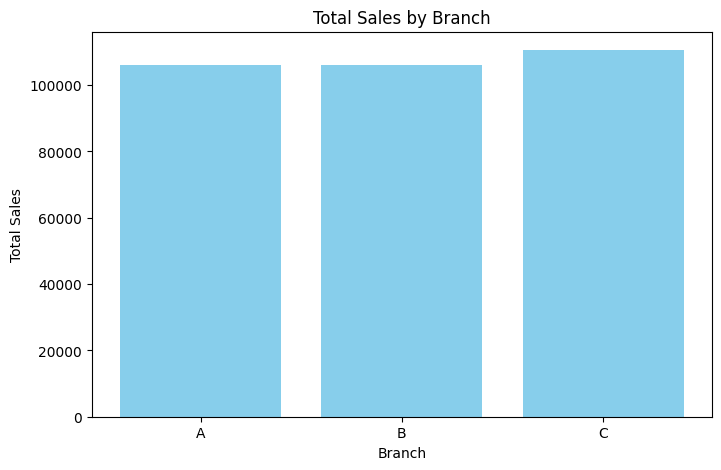

In [16]:
import matplotlib.pyplot as plt

# Plot total sales by branch
plt.figure(figsize=(8, 5))
plt.bar(total_sales_by_branch['Branch'], total_sales_by_branch['Total'], color='skyblue')
plt.title("Total Sales by Branch")
plt.xlabel("Branch")
plt.ylabel("Total Sales")
plt.show()



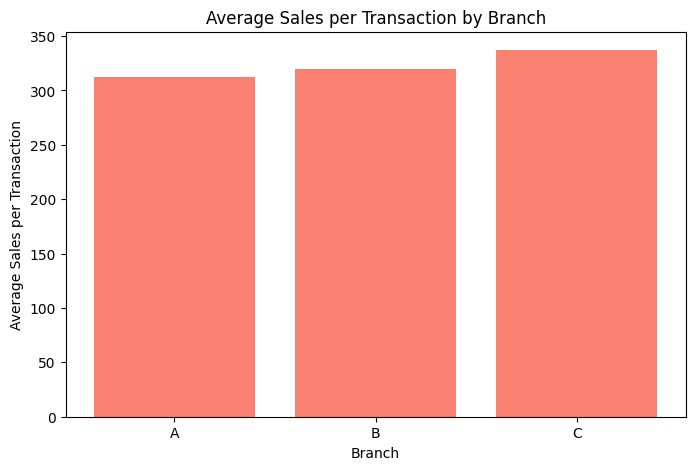

In [17]:
# Plot average sales per transaction by branch
plt.figure(figsize=(8, 5))
plt.bar(average_sales_by_branch['Branch'], average_sales_by_branch['Total'], color='salmon')
plt.title("Average Sales per Transaction by Branch")
plt.xlabel("Branch")
plt.ylabel("Average Sales per Transaction")
plt.show()


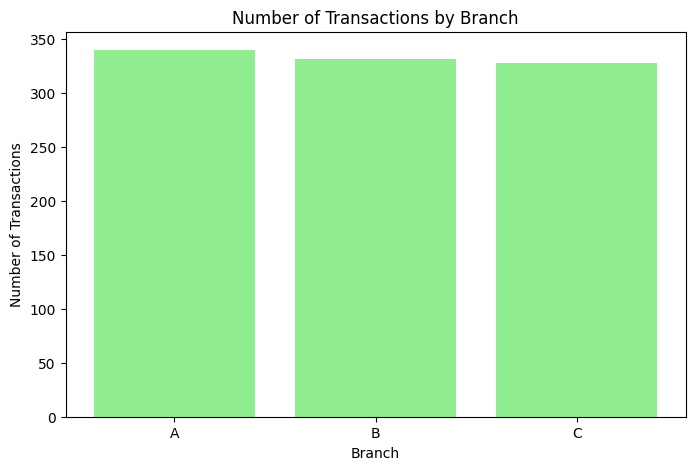

In [18]:
# Plot number of transactions by branch
plt.figure(figsize=(8, 5))
plt.bar(transaction_count_by_branch['Branch'], transaction_count_by_branch['Number of Transactions'], color='lightgreen')
plt.title("Number of Transactions by Branch")
plt.xlabel("Branch")
plt.ylabel("Number of Transactions")
plt.show()


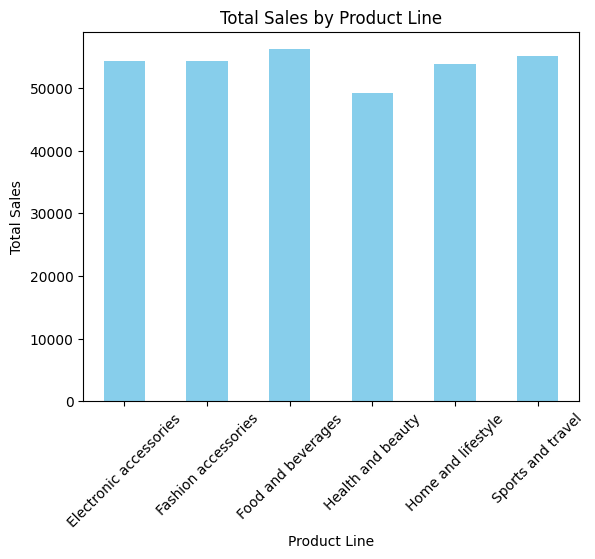

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total sales by Product line
df.groupby('Product line')['Total'].sum().plot(kind='bar', color='skyblue')
plt.title("Total Sales by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()
